In [1]:
import geopandas as gpd
import pandas as pd

In [4]:
# Total Precipitation preparation
# Load CSV
df_csv = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/kualitas_udara/so2/so2_satuan.csv')
tp_mean = df_csv.groupby(['longitude', 'latitude'], as_index=False)['so2'].mean()

In [5]:
# Load shapefile into a GeoDataFrame
gdf_shapefile = gpd.read_file(r"/Users/roniabuhanif/Downloads/BMKG/data_skripsi/petadki_kota/Kota_DKIJakarta.shp")

In [6]:
# Convert DataFrame to GeoDataFrame
geometry = gpd.points_from_xy(tp_mean['longitude'], tp_mean['latitude'])
gdf_csv = gpd.GeoDataFrame(tp_mean, geometry=geometry, crs=4326)


<Axes: >

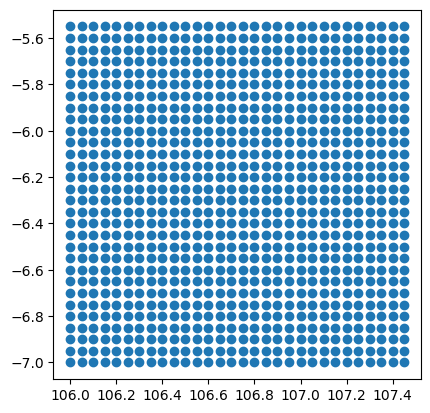

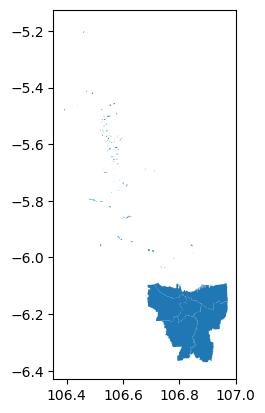

In [7]:
gdf_csv.plot()
gdf_shapefile.plot()

In [17]:
# spatial join
result = gpd.sjoin(gdf_csv, gdf_shapefile, how='inner', predicate='intersects')
result_pop = result[['longitude', 'latitude', 'tcso2', 'KABKOT', 'geometry']]

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 24 entries, 437 to 586
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   longitude  24 non-null     float64 
 1   latitude   24 non-null     float64 
 2   tcso2      24 non-null     float64 
 3   KABKOT     24 non-null     object  
 4   geometry   24 non-null     geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 1.1+ KB


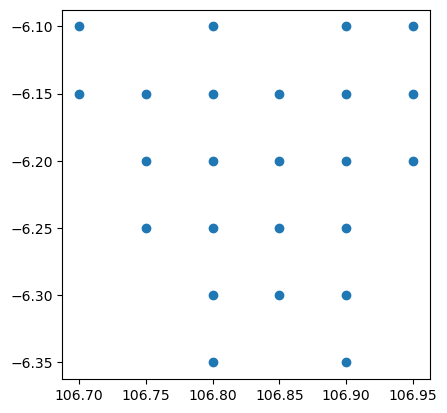

In [18]:
result_pop.plot()
result_pop.info()

In [19]:

dissolved_result = result_pop.dissolve(by='KABKOT', aggfunc='mean')
dissolved_result.head()

,geometry,longitude,latitude,tcso2
KABKOT,,,,
JAKARTA BARAT,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.750000,-6.158333,0.000007
JAKARTA PUSAT,POINT (106.85000 -6.20000),106.850000,-6.200000,0.000007
JAKARTA SELATAN,"MULTIPOINT ((106.75000 -6.25000), (106.80000 -...",106.808333,-6.283333,0.000007
JAKARTA TIMUR,"MULTIPOINT ((106.90000 -6.35000), (106.90000 -...",106.910000,-6.260000,0.000007
JAKARTA UTARA,"MULTIPOINT ((106.80000 -6.10000), (106.85000 -...",106.891667,-6.125000,0.000007


In [20]:
polygon_result = gpd.sjoin(gdf_shapefile, dissolved_result, how='inner', predicate='intersects')

<Axes: >

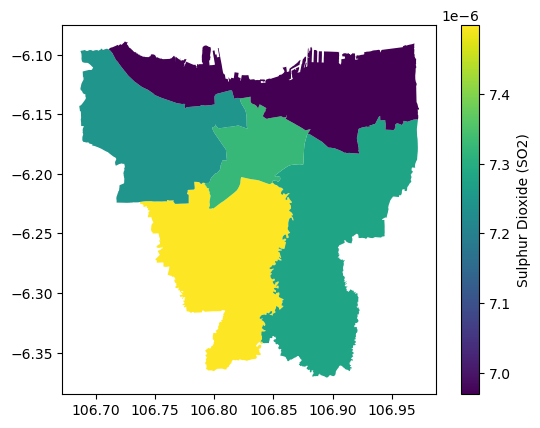

In [21]:
polygon_result.plot(column="tcso2", legend=True, legend_kwds={"label": "Sulphur Dioxide (SO2)"})

In [22]:
polygon_result.to_file('polygon_so2_result.shp')

/var/folders/81/vqbnjx_x20zdr2m7bscdvp5r0000gn/T/ipykernel_5143/2637909191.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  polygon_result.to_file('polygon_so2_result.shp')
